In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from PIL import Image

In [3]:
#get url
url = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=500'
response = requests.get(url)

In [4]:
#parse the reponse from the web to get just the html file
html_data = BeautifulSoup(response.text, 'html')

In [5]:
#find the html table tags
table = html_data.find_all('table', class_='review-ratings')

In [6]:
#remove the first row in the table as it contains the review examples
table = table[1:]

In [8]:
#extract the header names and values/stars
frame = []
for tab in table:
    frames = []
    tabrow = tab.find_all('tr')
    for tr in tabrow:
        tabcol = tr.find_all('td')
        header_name = tabcol[0].text.strip()
        if tabcol[1].find('span'):
            star = tabcol[1].find_all('span', class_ = 'fill')
            frames.append([header_name, len(star)])
        else:   
            value = tabcol[1].text.strip()
            frames.append([header_name, value])
    frame.append(frames)
        
        

In [9]:
len(frame)

500

In [10]:
#create a list of data frames
airline_frame = []
for i in frame:
    custom_frame = {}
    for j in range(len(i)):
        custom_frame.update({i[j][0] : i[j][1]})
    airline_frame.append(custom_frame)
        

In [11]:
#convert list to dataframe
review_df = pd.DataFrame(airline_frame)

                                                    ANALYZE DATASETS

data overview

empty values

data type accuracy

value constistency 


duplicate rows - no need, because there is a possibility that two different people travel solo on economic class and have the same reviews(maybe friends)


In [13]:
review_df.describe(include='all')

,Type Of Traveller,Seat Type,Route,Date Flown,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Aircraft
count,498,500,498,500,500.000000,500,466.000000,460.000000,402.000000,271.000000,482.000000,185.000000,255
unique,4,4,383,32,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,47
top,Couple Leisure,Economy Class,San Francisco to London,June 2023,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,A320
freq,183,283,6,34,NaN,365,NaN,NaN,NaN,NaN,NaN,NaN,71
mean,NaN,NaN,NaN,NaN,2.148000,NaN,2.587983,2.989130,2.477612,2.638376,2.321577,2.016216,NaN
std,NaN,NaN,NaN,NaN,1.384894,NaN,1.351139,1.498689,1.438947,1.427976,1.468417,1.427508,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,1.000000,NaN,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,3.000000,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,NaN


In [14]:
#check nan values
for col in review_df.columns.tolist():
    null_val = review_df[col].isnull()
    null_true = null_val[null_val]==True
    print(col, len(null_true))

Type Of Traveller 2
Seat Type 0
Route 2
Date Flown 0
Value For Money 0
Recommended 0
Seat Comfort 34
Cabin Staff Service 40
Food & Beverages 98
Inflight Entertainment 229
Ground Service 18
Wifi & Connectivity 315
Aircraft 245


#######dealing with empty rows




type of traveller - replace with max


route - replace with max


seat comfort - replace with mean


cabin staff servcie - replace with mean


food and beverage - replace with mean


inflight entertainment - remove column/delete row(we will first delete rows for aircraft, then check)


ground services - replace with mean


wifi and connectivity - remove column//delete row(we will first delete rows for aircraft, then check)


aircraft - delete row(aircraft type is an important feature)

In [15]:
import numpy as np

In [16]:
#null values for Type Of Traveller
top = 'Couple Leisure'
review_df['Type Of Traveller'].replace(np.nan, top, inplace=True)

In [17]:
#null values for Route
top = 'San Francisco to London'
review_df['Route'].replace(np.nan, top, inplace=True)

In [18]:
#null values for Seat Comfort
mean = review_df['Seat Comfort'].mean()
review_df['Seat Comfort'].replace(np.nan, mean, inplace=True)

In [19]:
#null values for Cabin Staff Service
mean = review_df['Cabin Staff Service'].mean()
review_df['Cabin Staff Service'].replace(np.nan, mean, inplace=True)

In [20]:
#null values for Food & Beverages
mean = review_df['Food & Beverages'].mean()
review_df['Food & Beverages'].replace(np.nan, mean, inplace=True)

In [21]:
#null values for Ground Service
mean = review_df['Ground Service'].mean()
review_df['Ground Service'].replace(np.nan, mean, inplace=True)

In [22]:
#null values for Aircraft
review_df['Aircraft'].dropna(axis=0, inplace=True)

In [23]:
review_df = review_df[review_df['Aircraft'].isnull()==False].reset_index()

In [24]:
review_df.drop(columns='index', axis = 1)

,Type Of Traveller,Seat Type,Route,Date Flown,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Aircraft
0,Business,Business Class,London Heathrow to Paris CDG,June 2024,3,yes,4.0,5.0,3.0,NaN,1.0,NaN,A320
1,Solo Leisure,Economy Class,London Heathrow to Vancouver,June 2024,1,no,2.0,2.0,1.0,2.0,2.0,NaN,A350-1000
2,Solo Leisure,Business Class,Vancouver to London Heathrow,June 2024,2,no,3.0,3.0,3.0,3.0,1.0,3.0,A350-1000
3,Couple Leisure,Business Class,Belfast to San Francisco via London,April 2024,4,yes,5.0,5.0,3.0,3.0,5.0,NaN,A320/A380
4,Solo Leisure,Business Class,New York JFK to London Heathrow,June 2024,2,yes,5.0,5.0,4.0,3.0,1.0,NaN,Boeing 777
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Couple Leisure,Business Class,London to Thira,June 2022,5,yes,5.0,5.0,5.0,NaN,5.0,NaN,A320
251,Solo Leisure,Business Class,Vancouver to London,June 2022,5,yes,4.0,5.0,3.0,4.0,2.0,4.0,A380
252,Business,Economy Class,London to Boston,May 2022,3,yes,4.0,5.0,5.0,NaN,5.0,5.0,Boeing 777-300ER
253,Couple Leisure,Business Class,Johannesburg to London Heathrow,April 2022,3,yes,4.0,4.0,3.0,NaN,3.0,NaN,Boeing 777


Inflight Entertainment and Wifi connectivity has 103 and 160 null rows regardless. So we will delete the columns

In [25]:
review_df = review_df.drop(columns = ['Inflight Entertainment', 'Wifi & Connectivity'], axis = 1)

In [26]:
review_df.drop(columns = 'index', axis = 1)

,Type Of Traveller,Seat Type,Route,Date Flown,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Aircraft
0,Business,Business Class,London Heathrow to Paris CDG,June 2024,3,yes,4.0,5.0,3.0,1.0,A320
1,Solo Leisure,Economy Class,London Heathrow to Vancouver,June 2024,1,no,2.0,2.0,1.0,2.0,A350-1000
2,Solo Leisure,Business Class,Vancouver to London Heathrow,June 2024,2,no,3.0,3.0,3.0,1.0,A350-1000
3,Couple Leisure,Business Class,Belfast to San Francisco via London,April 2024,4,yes,5.0,5.0,3.0,5.0,A320/A380
4,Solo Leisure,Business Class,New York JFK to London Heathrow,June 2024,2,yes,5.0,5.0,4.0,1.0,Boeing 777
...,...,...,...,...,...,...,...,...,...,...,...
250,Couple Leisure,Business Class,London to Thira,June 2022,5,yes,5.0,5.0,5.0,5.0,A320
251,Solo Leisure,Business Class,Vancouver to London,June 2022,5,yes,4.0,5.0,3.0,2.0,A380
252,Business,Economy Class,London to Boston,May 2022,3,yes,4.0,5.0,5.0,5.0,Boeing 777-300ER
253,Couple Leisure,Business Class,Johannesburg to London Heathrow,April 2022,3,yes,4.0,4.0,3.0,3.0,Boeing 777


In [27]:
#check nan values
for col in review_df.columns.tolist():
    null_val = review_df[col].isnull()
    null_true = null_val[null_val]==True
    print(col, len(null_true))

index 0
Type Of Traveller 0
Seat Type 0
Route 0
Date Flown 0
Value For Money 0
Recommended 0
Seat Comfort 0
Cabin Staff Service 0
Food & Beverages 0
Ground Service 0
Aircraft 0


In [28]:
#data type accuracy

review_df.dtypes

index                    int64
Type Of Traveller       object
Seat Type               object
Route                   object
Date Flown              object
Value For Money          int64
Recommended             object
Seat Comfort           float64
Cabin Staff Service    float64
Food & Beverages       float64
Ground Service         float64
Aircraft                object
dtype: object

In [29]:
#convert the star ratings from float to int
review_df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service']] = review_df[['Seat Comfort','Cabin Staff Service', 'Food & Beverages', 'Ground Service']].astype(int)
#review_df = review_df.drop(columns='index', axis = 0)

            DATE ETXRACTION

In [30]:
#dateflown from object to datetime 
from datetime import datetime
years = []
months = []
for index in review_df['Date Flown']:
    new_date = datetime.strptime(index, '%B %Y')
    year = datetime.strftime(new_date, '%Y')
    month = datetime.strftime(new_date, '%B')
    years.append(year)
    months.append(month)

In [31]:
review_df['Year'] = years

In [32]:
review_df['Month'] = months

In [33]:
review_df.drop(columns='Date Flown', axis = 1, inplace=True)

In [34]:
review_df.head()

,index,Type Of Traveller,Seat Type,Route,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Aircraft,Year,Month
0,2,Business,Business Class,London Heathrow to Paris CDG,3,yes,4,5,3,1,A320,2024,June
1,3,Solo Leisure,Economy Class,London Heathrow to Vancouver,1,no,2,2,1,2,A350-1000,2024,June
2,4,Solo Leisure,Business Class,Vancouver to London Heathrow,2,no,3,3,3,1,A350-1000,2024,June
3,5,Couple Leisure,Business Class,Belfast to San Francisco via London,4,yes,5,5,3,5,A320/A380,2024,April
4,7,Solo Leisure,Business Class,New York JFK to London Heathrow,2,yes,5,5,4,1,Boeing 777,2024,June


In [35]:
#consistency of data
for col in review_df.columns.tolist():
    print(review_df[col].unique())

[  2   3   4   5   7   8  10  11  13  16  19  21  24  26  27  29  31  32
  33  35  38  39  40  41  42  44  45  46  47  49  50  51  52  53  54  57
  58  61  62  64  65  67  68  69  70  71  75  77  81  82  88  89  90  93
  94  95  96  97  98  99 102 103 104 106 108 109 110 111 114 116 118 120
 121 124 125 126 127 129 131 133 135 137 140 142 143 144 147 149 151 152
 153 154 155 156 157 160 161 167 169 173 174 176 178 179 181 182 185 187
 188 191 194 195 196 199 201 202 204 206 207 209 214 215 216 217 219 220
 221 222 223 225 226 228 229 230 233 238 240 242 243 252 255 257 265 266
 269 270 271 279 283 285 286 287 288 293 298 299 300 303 304 306 307 308
 310 316 317 318 322 329 332 336 338 339 340 341 344 345 346 349 350 352
 354 356 357 358 362 363 366 367 369 371 372 373 374 375 378 379 380 385
 386 387 388 389 390 393 394 395 396 397 401 403 407 408 409 410 411 412
 413 414 415 417 418 419 420 421 422 423 424 425 426 427 432 435 441 447
 450 453 454 457 458 459 462 465 466 468 477 478 48

every value is consistent with what is expected of the column

In [36]:
review_df

,index,Type Of Traveller,Seat Type,Route,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Aircraft,Year,Month
0,2,Business,Business Class,London Heathrow to Paris CDG,3,yes,4,5,3,1,A320,2024,June
1,3,Solo Leisure,Economy Class,London Heathrow to Vancouver,1,no,2,2,1,2,A350-1000,2024,June
2,4,Solo Leisure,Business Class,Vancouver to London Heathrow,2,no,3,3,3,1,A350-1000,2024,June
3,5,Couple Leisure,Business Class,Belfast to San Francisco via London,4,yes,5,5,3,5,A320/A380,2024,April
4,7,Solo Leisure,Business Class,New York JFK to London Heathrow,2,yes,5,5,4,1,Boeing 777,2024,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,489,Couple Leisure,Business Class,London to Thira,5,yes,5,5,5,5,A320,2022,June
251,491,Solo Leisure,Business Class,Vancouver to London,5,yes,4,5,3,2,A380,2022,June
252,492,Business,Economy Class,London to Boston,3,yes,4,5,5,5,Boeing 777-300ER,2022,May
253,495,Couple Leisure,Business Class,Johannesburg to London Heathrow,3,yes,4,4,3,3,Boeing 777,2022,April


                                                 Univariate Analysis

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

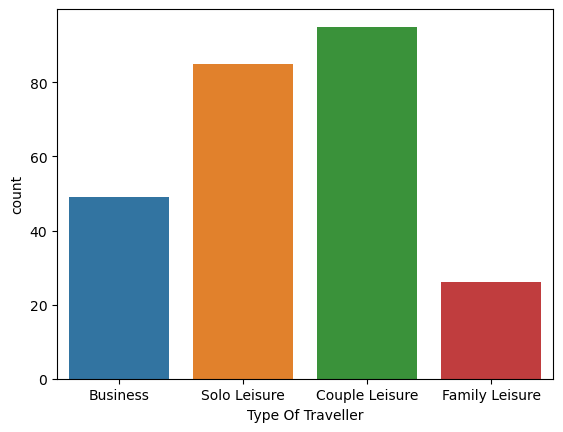

In [80]:
#Type of traveller
sns.countplot(data = review_df, x = 'Type Of Traveller')
plt.savefig('travelcount.jpg', dpi=300)

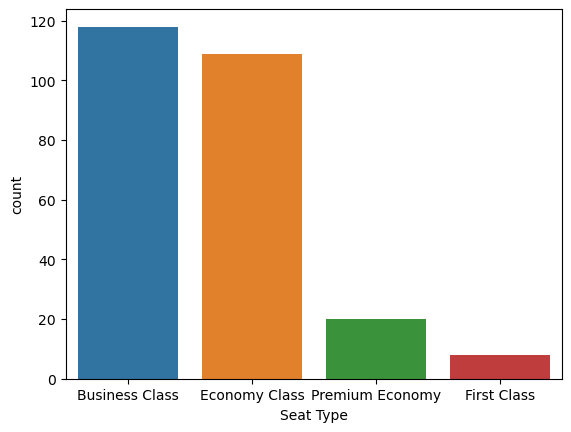

In [81]:
#SeatType
sns.countplot(data = review_df, x='Seat Type')
plt.savefig('seattypecount', dpi=300)

There are more business class and Economic class, and the graph shows an obvious skewness.

####Route
There are 205 unique Routes

<Axes: xlabel='Value For Money', ylabel='count'>

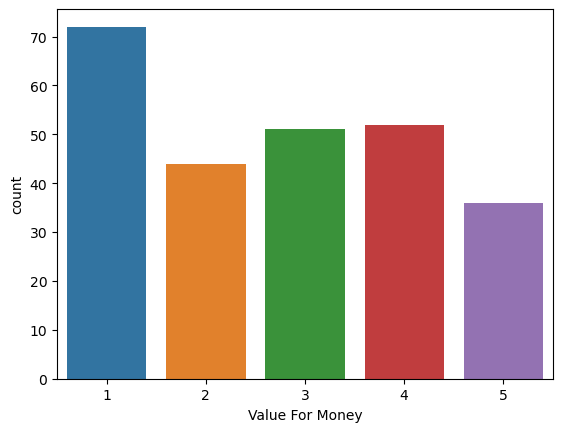

In [40]:
#value for money - this variable is categorical despite being an integer
sns.countplot(data = review_df, x='Value For Money')

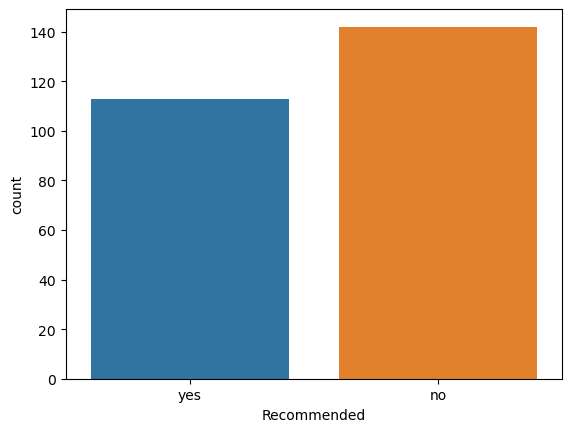

In [93]:
#recommended
sns.countplot(data = review_df, x='Recommended')
plt.savefig('recommend.jpg', dpi=300)

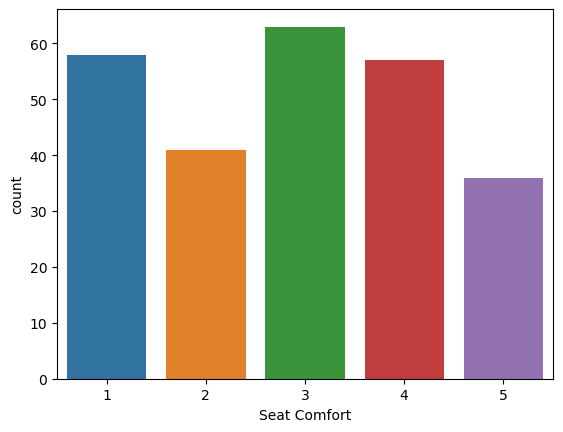

In [92]:
#seatcomfort
sns.countplot(data = review_df, x='Seat Comfort')
plt.savefig('seat.jpg', dpi=300)

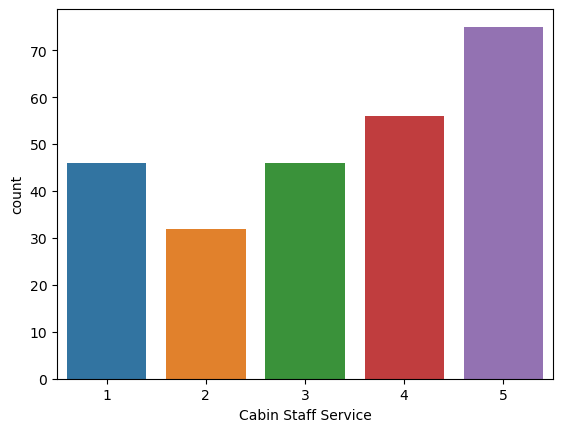

In [91]:
#cabin_staff service
sns.countplot(data = review_df, x='Cabin Staff Service')
plt.savefig('cabin.jpg', dpi=300)

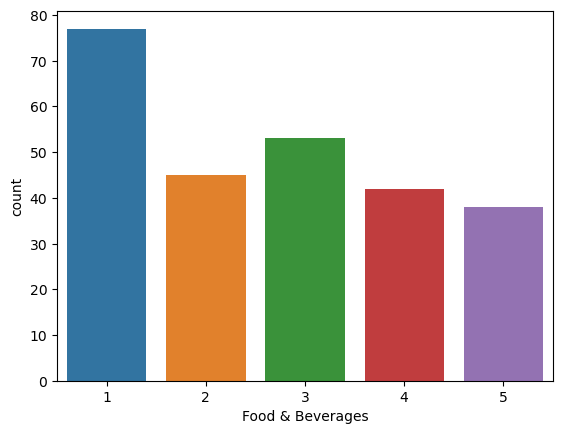

In [90]:
#food and beverages
sns.countplot(data = review_df, x='Food & Beverages')
plt.savefig('food.jpg', dpi=300)

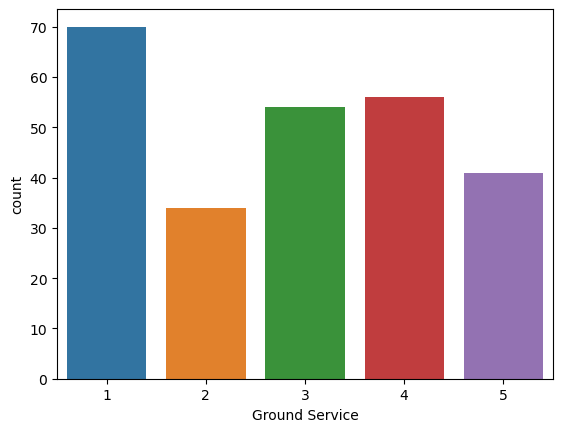

In [89]:
#ground_service
sns.countplot(data = review_df, x='Ground Service')
plt.savefig('service.jpg', dpi=300)

In [46]:
#Top 10 Aircraft
top_craft = review_df.groupby(['Aircraft'], as_index=False).count()
#since the result is a count of rows by aircraft, each column contains the same number, therefore we can sort by any column
top_top_craft = top_craft.sort_values(by='Month', ascending = False)
top_aircraft = top_top_craft[['Aircraft', 'Month']].head(10)

In [47]:
#rename column from month to count
top_aircraft = top_aircraft.rename(columns={'Month':'Count'})
top_aircraft

,Aircraft,Count
4,A320,71
30,Boeing 777,33
23,A380,27
21,A350,15
15,A321,13
33,Boeing 777-200,12
36,Boeing 787,10
34,Boeing 777-300,9
41,Boeing 787-9,5
1,A319,5


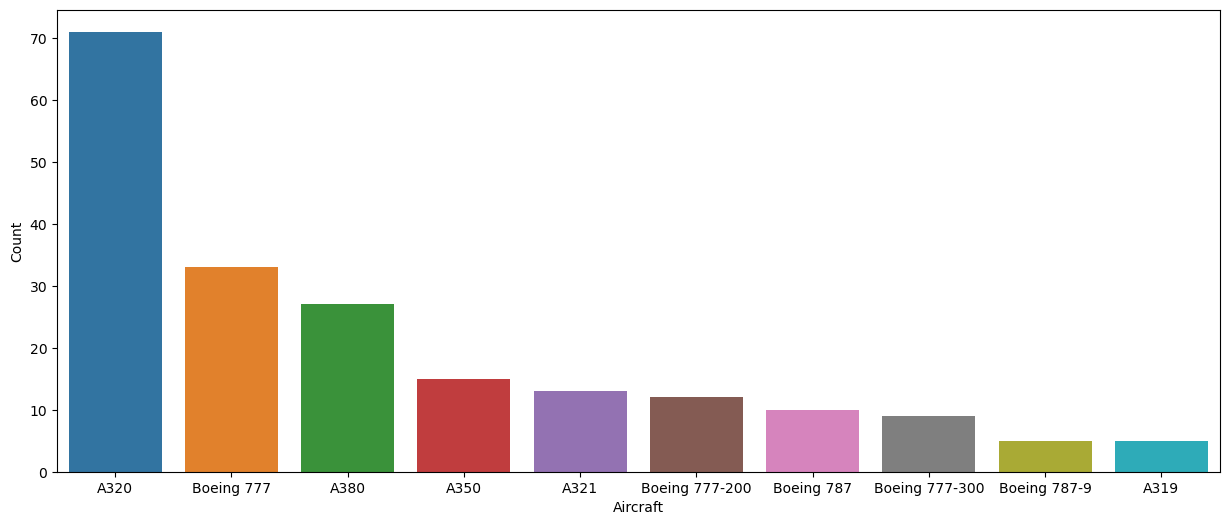

In [88]:
#plot graph
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data = top_aircraft, x='Aircraft', y='Count', ax=ax)
plt.savefig('aircraftcount.jpg', dpi=300)
plt.show()

<Axes: xlabel='Year', ylabel='count'>

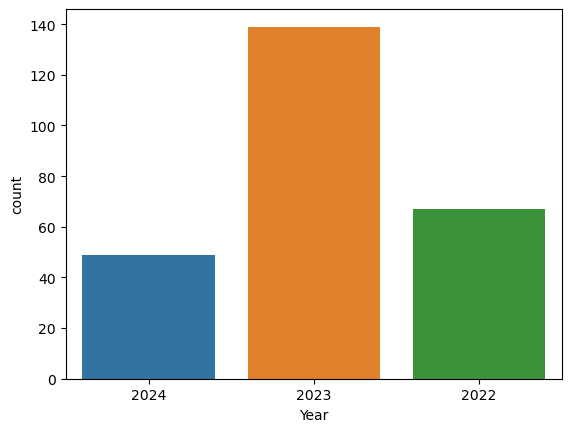

In [49]:
#Year
sns.countplot(data = review_df, x='Year')

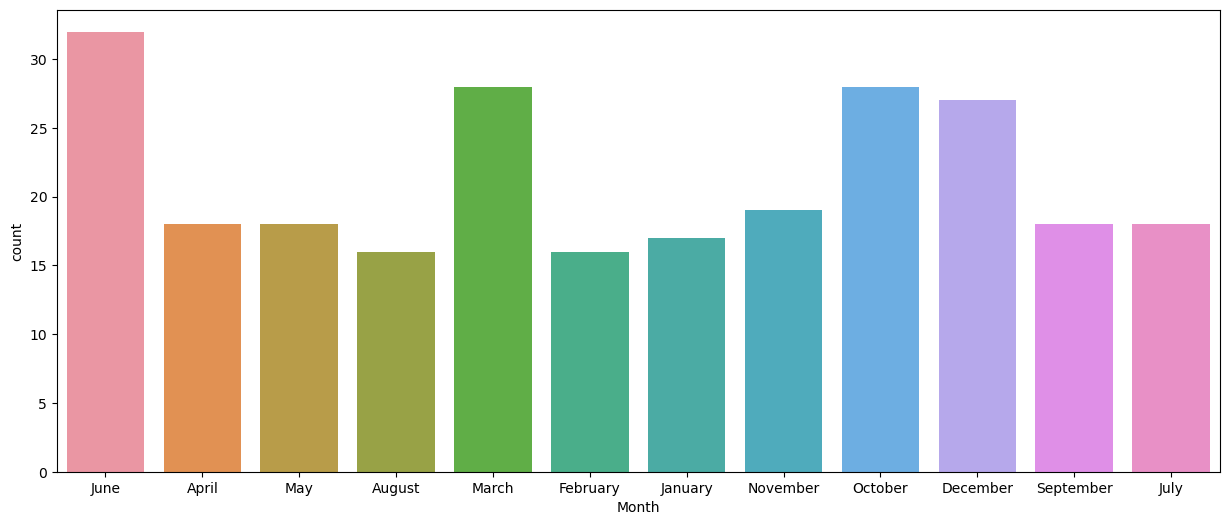

In [50]:
#Month

fig, ax = plt.subplots(figsize = (15,6))
sns.countplot(data = review_df, x='Month', ax=ax)

plt.show()

                                                                WORD CLOUD

In [51]:
comment_header = html_data.find_all('h2', class_ ='text_header')

In [52]:
comment_header[0]

<h2 class="text_header">"over 2 weeks to respond" </h2>

In [53]:
topics = []
for i in comment_header:
    topics.append(i.text.strip())
topics

['"over 2 weeks to respond"',
 '“wholly inadequate customer service”',
 '“the cabin crew were great”',
 '"cannot recommend BA"',
 '“a very poor last impression of BA”',
 '"happy to recommend BA"',
 '"cancelled our return flight"',
 '"Very good experience all round"',
 '"inflight service was efficient and friendly"',
 '“worst airline I’ve ever flown”',
 '"Cabin crew were great"',
 '"flight itself was quite good"',
 '"You expect better from BA"',
 '“never fly British Airways"',
 '“we will rethink BA moving forward”',
 '“extremely poor customer service”',
 '“a pleasant and civilized journey”',
 '"the worst BA flight we\'ve experienced"',
 '"Never again British Airways"',
 '"only been offered half a glass of water"',
 '"told by cabin crew I would be refunded"',
 '“premium price for a sub-par product”',
 '"can\'t even choose my own seat"',
 '“Very impressed with BA”',
 '"appalling customer service"',
 '"baggage customer service is a joke"',
 '"Worst business class ever"',
 '"replicating the

In [54]:
topics = " ".join(topic for topic in topics)

In [55]:
stopwords = set(STOPWORDS)
stopwords.update(['flight', 'BA', 'airline', 'cabin','service', 'hour', 'seat', 'British', 'Airway', 'Airways', 'experience', 'customer', 'crew', 'British Airway', 'luggage', 'British Airway'])
wordcloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(topics)

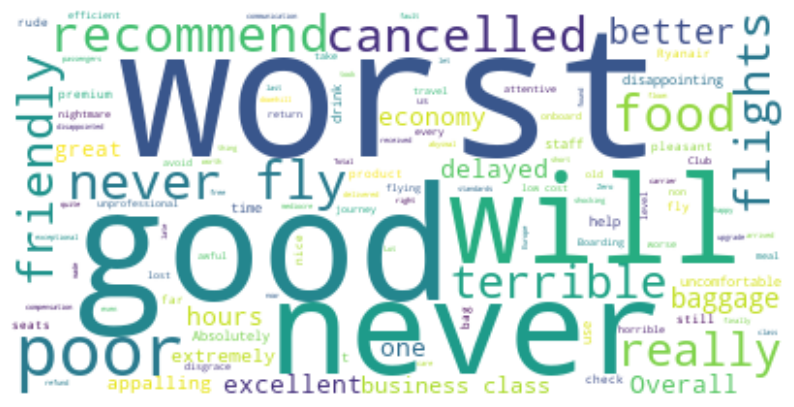

In [86]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcount.svg', dpi=300)
plt.show()

INSIGHTS FROM UNIVARIATE ANALYSIS:



                                                
                                                
                                                
                                                BIVARIATE ANALYSIS


                                                

In [57]:
from scipy.stats import chi2_contingency

In [58]:
import scipy

In [59]:
travel_type_moneyvalue = pd.crosstab(review_df['Type Of Traveller'], review_df['Value For Money'])
travel_type_moneyvalue

Value For Money,1,2,3,4,5
Type Of Traveller,,,,,
Business,18,13,9,7,2
Couple Leisure,28,10,20,26,11
Family Leisure,5,6,4,8,3
Solo Leisure,21,15,18,11,20


In [60]:
chi2_contingency(travel_type_moneyvalue)

Chi2ContingencyResult(statistic=24.570613756246814, pvalue=0.01699391047261978, dof=12, expected_freq=array([[13.83529412,  8.45490196,  9.8       ,  9.99215686,  6.91764706],
       [26.82352941, 16.39215686, 19.        , 19.37254902, 13.41176471],
       [ 7.34117647,  4.48627451,  5.2       ,  5.30196078,  3.67058824],
       [24.        , 14.66666667, 17.        , 17.33333333, 12.        ]]))

There relationship between Type of Traveller and Value for money is significant.

In [61]:
travel_type_comfort_contingency = pd.crosstab(review_df['Type Of Traveller'], review_df['Seat Comfort'], margins=False)
travel_type_comfort_contingency

Seat Comfort,1,2,3,4,5
Type Of Traveller,,,,,
Business,9,12,16,7,5
Couple Leisure,28,11,19,22,15
Family Leisure,6,4,3,12,1
Solo Leisure,15,14,25,16,15


In [62]:
chi2_contingency(travel_type_comfort_contingency)

Chi2ContingencyResult(statistic=23.264992948701476, pvalue=0.02555864565047642, dof=12, expected_freq=array([[11.14509804,  7.87843137, 12.10588235, 10.95294118,  6.91764706],
       [21.60784314, 15.2745098 , 23.47058824, 21.23529412, 13.41176471],
       [ 5.91372549,  4.18039216,  6.42352941,  5.81176471,  3.67058824],
       [19.33333333, 13.66666667, 21.        , 19.        , 12.        ]]))

The relationship between Type Of Traveller and Seat comfort is significant

In [63]:
travel_type_cabinstaff = pd.crosstab(review_df['Type Of Traveller'], review_df['Cabin Staff Service'])
travel_type_cabinstaff

Cabin Staff Service,1,2,3,4,5
Type Of Traveller,,,,,
Business,8,9,11,10,11
Couple Leisure,14,11,20,21,29
Family Leisure,5,4,1,5,11
Solo Leisure,19,8,14,20,24


In [64]:
chi2_contingency(travel_type_cabinstaff)

Chi2ContingencyResult(statistic=10.39951379669226, pvalue=0.5809554952578382, dof=12, expected_freq=array([[ 8.83921569,  6.14901961,  8.83921569, 10.76078431, 14.41176471],
       [17.1372549 , 11.92156863, 17.1372549 , 20.8627451 , 27.94117647],
       [ 4.69019608,  3.2627451 ,  4.69019608,  5.70980392,  7.64705882],
       [15.33333333, 10.66666667, 15.33333333, 18.66666667, 25.        ]]))

The relationship between Type of Traveller and Cabin Staff Service is not significant

In [65]:
travel_type_food = pd.crosstab(review_df['Type Of Traveller'], review_df['Food & Beverages'])
travel_type_food

Food & Beverages,1,2,3,4,5
Type Of Traveller,,,,,
Business,11,14,14,7,3
Couple Leisure,30,14,22,15,14
Family Leisure,7,3,5,8,3
Solo Leisure,29,14,12,12,18


In [66]:
chi2_contingency(travel_type_food)

Chi2ContingencyResult(statistic=18.141373595324353, pvalue=0.11146487501827358, dof=12, expected_freq=array([[14.79607843,  8.64705882, 10.18431373,  8.07058824,  7.30196078],
       [28.68627451, 16.76470588, 19.74509804, 15.64705882, 14.15686275],
       [ 7.85098039,  4.58823529,  5.40392157,  4.28235294,  3.8745098 ],
       [25.66666667, 15.        , 17.66666667, 14.        , 12.66666667]]))

The relationship between Type Of Traveller and Food & Beverages is not significant

In [67]:
travel_type_groundservice = pd.crosstab(review_df['Type Of Traveller'], review_df['Ground Service'])
travel_type_groundservice

Ground Service,1,2,3,4,5
Type Of Traveller,,,,,
Business,21,5,11,4,8
Couple Leisure,19,17,18,26,15
Family Leisure,8,2,6,7,3
Solo Leisure,22,10,19,19,15


In [68]:
chi2_contingency(travel_type_groundservice)

Chi2ContingencyResult(statistic=15.598778584891523, pvalue=0.21031131652988788, dof=12, expected_freq=array([[13.45098039,  6.53333333, 10.37647059, 10.76078431,  7.87843137],
       [26.07843137, 12.66666667, 20.11764706, 20.8627451 , 15.2745098 ],
       [ 7.1372549 ,  3.46666667,  5.50588235,  5.70980392,  4.18039216],
       [23.33333333, 11.33333333, 18.        , 18.66666667, 13.66666667]]))

The relationship between Type Of Traveller and Ground Service is not significant

Aircraft variable is skewed with majority of customers going by A320. There will be no significance

The countplot for Seat Type suggests that the data is skewed. Therefore we won't be using it for analysis.

                        NEXT IS THE RELATIONSHIP BETWEEN THE STAR RATINGS AND RECOMMENDATION
                        

In [69]:
value_recommend = pd.crosstab(review_df['Seat Comfort'], review_df['Recommended'])
value_recommend

Recommended,no,yes
Seat Comfort,,
1,53,5
2,35,6
3,37,26
4,12,45
5,5,31


In [70]:
chi2_contingency(value_recommend)

Chi2ContingencyResult(statistic=98.00957527307096, pvalue=2.6091721234051895e-20, dof=4, expected_freq=array([[32.29803922, 25.70196078],
       [22.83137255, 18.16862745],
       [35.08235294, 27.91764706],
       [31.74117647, 25.25882353],
       [20.04705882, 15.95294118]]))

In [71]:
cabin_recommend = pd.crosstab(review_df['Cabin Staff Service'], review_df['Recommended'])
cabin_recommend

Recommended,no,yes
Cabin Staff Service,,
1,46,0
2,30,2
3,33,13
4,22,34
5,11,64


In [72]:
chi2_contingency(cabin_recommend)

Chi2ContingencyResult(statistic=117.4413004092272, pvalue=1.8796204861743488e-24, dof=4, expected_freq=array([[25.61568627, 20.38431373],
       [17.81960784, 14.18039216],
       [25.61568627, 20.38431373],
       [31.18431373, 24.81568627],
       [41.76470588, 33.23529412]]))

In [73]:
food_recommend = pd.crosstab(review_df['Food & Beverages'], review_df['Recommended'])
food_recommend

Recommended,no,yes
Food & Beverages,,
1,71,6
2,34,11
3,22,31
4,14,28
5,1,37


In [74]:
chi2_contingency(food_recommend)

Chi2ContingencyResult(statistic=104.98570923962326, pvalue=8.529796570693098e-22, dof=4, expected_freq=array([[42.87843137, 34.12156863],
       [25.05882353, 19.94117647],
       [29.51372549, 23.48627451],
       [23.38823529, 18.61176471],
       [21.16078431, 16.83921569]]))

In [75]:
service_recommend = pd.crosstab(review_df['Ground Service'], review_df['Recommended'])
service_recommend

Recommended,no,yes
Ground Service,,
1,63,7
2,26,8
3,31,23
4,14,42
5,8,33


In [76]:
chi2_contingency(service_recommend)

Chi2ContingencyResult(statistic=82.52783283628673, pvalue=5.073159733110296e-17, dof=4, expected_freq=array([[38.98039216, 31.01960784],
       [18.93333333, 15.06666667],
       [30.07058824, 23.92941176],
       [31.18431373, 24.81568627],
       [22.83137255, 18.16862745]]))

Given the p-values of the chi_square tests between  the star ratings and 'Recommend', we can say that the relationships between the star ratings and the 'recommend' variables are all significant


                                                            FINDINGS


The analysis aims to explore the reviews of British Airways to determine their customer's views about their services.
Data from 2022-2024 was scrapped from the Skytrax website which updates reviews for different airways.

From the data it was deduced that:


*Couples in leisure travelled the most


*Most frequent seat type was Business class, and


*Aircraft A320 was flown most frequently

The word which occurred the most frequently in their reviews were:
1. Worst
2. Good
3. Never
4. Never fly
5. Terrible
6. Cancelled


   This list gives a general overview of most of the feelings of most customers which appears to be essentially negative.

There is a relationship between the star ratings and a customer's tendency to recommend the airway, and given the frequency values in the contingency tables, the better the rating, the more a customer tends to recommend.

The star ratings for:

Seat Comfort - Most customers rated - 3

Cabin Staff Service - Most customers rated 5

Food and Beverages - Most customers rated 1

Ground Service - Most customers rated 1

Average rating bordered around 3 for each star rating


                                                            RECOMMENDATIONS
                                                            

1. Aircraft seats should be upgraded for customers' comfort
2. Cabin Staff service should be maintained and areas for upgrade should be considered
3. Foods and beverages served at the airport should be updated and evaluated for good quality and taste
4. Ground services should be evaluated and improved
5. Travel cancellation should be considered to ascertain reasons and possibly improve on the reasons to blame the airport